<a href="https://colab.research.google.com/github/rawandyousef/prediction-of-products-sales-/blob/main/prediction_of_products_sales_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: prediction-of-products-sales-**















*   *Author : Rawand Deek*

## **Project Overview**

# **imports**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load and Inspect Data**

In [1]:
import pandas as pd
# data to be read
file_path = '/content/drive/MyDrive/sales_predictions_2023.csv'
df = pd.read_csv(file_path)
df.head()







,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df2 = df.copy()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Clean Data**

In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#Checking for duplicated data:
df.duplicated().sum()

0

In [ ]:
#Checking for missing values:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Identifying % of missing data

df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
#there is 1463 missing value in item weight
#there is 2410 missing value in outlet_size

In [ ]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

In [ ]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
9.300     68
10.500    66
16.700    66
19.350    63
20.700    62
16.000    62
9.800     61
17.700    60
17.750    60
18.850    59
15.850    59
15.000    59
16.750    58
18.250    58
19.600    58
15.700    57
9.195     56
12.500    56
20.200    53
12.100    53
12.600    53
10.195    53
15.600    52
13.500    51
11.500    51
19.700    50
11.600    50
20.250    50
12.350    50
12.850    49
9.600     49
12.300    49
9.500     49
13.150    49
17.850    48
20.350    47
14.000    47
15.500    47
15.200    46
16.500    46
16.350    46
17.250    45
14.500    44
20.500    44
19.000    44
10.100    44
9.000     44
18.200    43
10.000    43
10.300    43
16.200    43
11.100    42
13.350    42
19.100    41
17.500    41
14.150    41
16.100    41
13.000    40
15.350    40
20.750    39
19.850    39
19.200    39
11.650    39
13.100    39
18.000    38
20.600    38
18.700    38
18.350    37
18.600    37
17.350    37
17.100    36
12.650    36

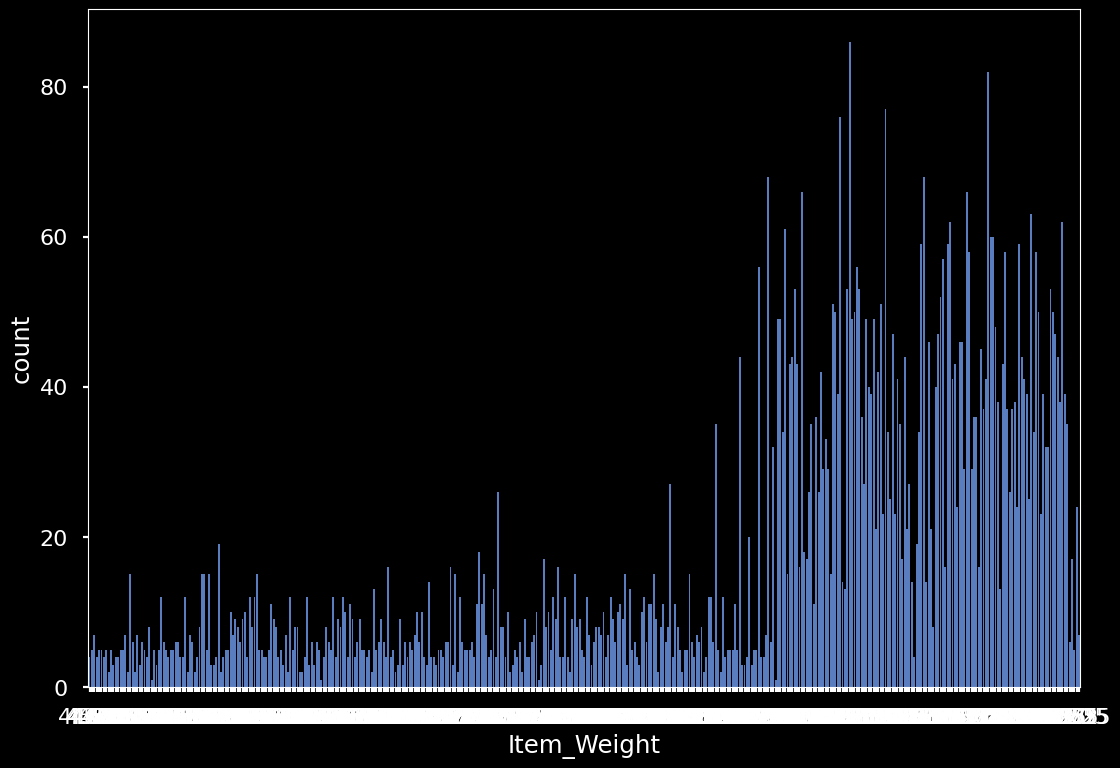

In [ ]:
ax = sns.countplot(data = df, x = 'Item_Weight');


In [ ]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


In [ ]:
#filling in the Item_Weight column with the median value.
median_value = df['Item_Weight'].median()
df['Item_Weight'] = df['Item_Weight'].fillna(median_value)

In [ ]:
#Checking to make sure the values for the Item_Weight column were filled in.
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

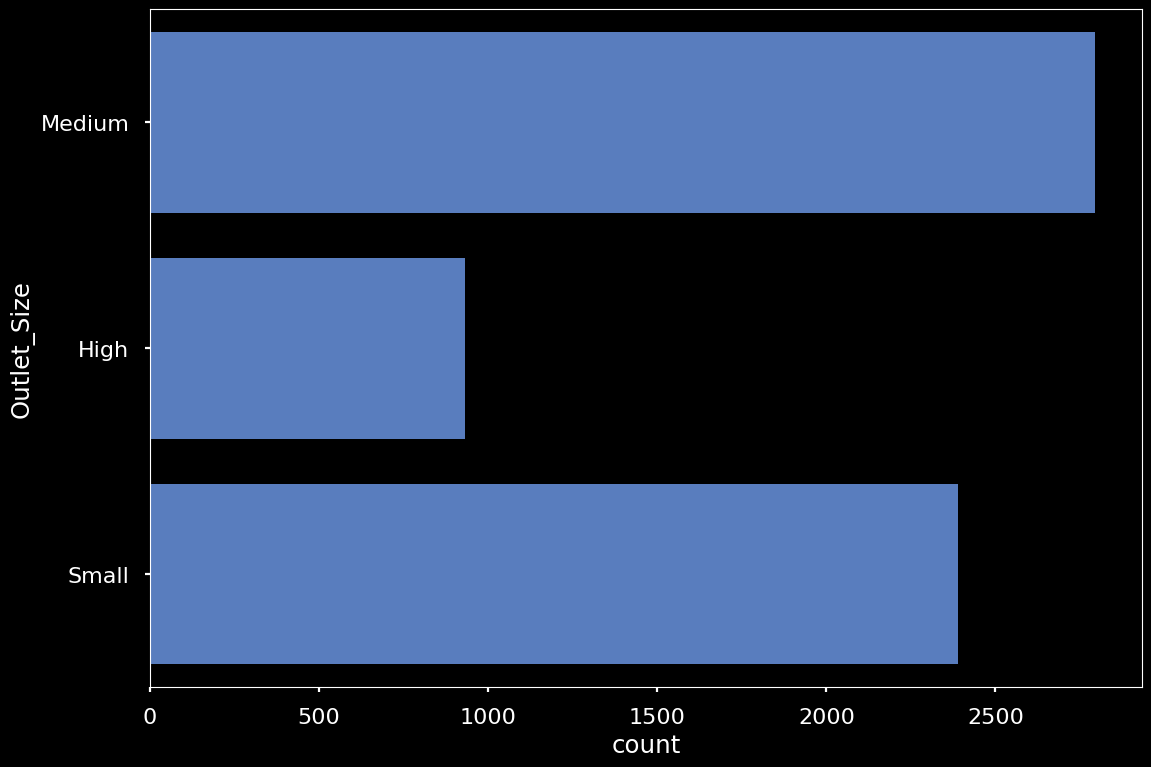

In [ ]:
ax = sns.countplot(data = df, y = 'Outlet_Size');

In [ ]:
#filling in the Outlet_Size column with the median value.
df['Outlet_Size'] = df['Outlet_Size'].fillna('Missing')
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
#Checking to make sure the values for the Outlet_Size column were filled in.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Inspecting Categorical Columns & Addressing Inconsistent Values

In [ ]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38     8
NCE31    

In [ ]:

categorical_columns = df.select_dtypes(include=['object']).columns
# Printing unique values in each categorical column
for col in categorical_columns:
    print(f"Unique values in '{col}':\n{df[col].unique()}\n")


Unique values in 'Item_Identifier':
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Unique values in 'Item_Fat_Content':
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in 'Item_Type':
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values in 'Outlet_Identifier':
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Unique values in 'Outlet_Size':
['Medium' 'Missing' 'High' 'Small']

Unique values in 'Outlet_Location_Type':
['Tier 1' 'Tier 3' 'Tier 2']

Unique values in 'Outlet_Type':
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [ ]:
#addressing inconsistencies with a data map and use a dictionary to replace the inconsistent categories.
# Creating a data map for inconsistent categories
data_map = {
    'Item_Fat_Content': {
        'LF': 'Low Fat',
        'low fat': 'Low Fat',
        'reg': 'Regular',
        # Other mappings
    }
}

# Correctly apply the mapping for 'Item_Fat_Content'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(data_map['Item_Fat_Content'])


In [ ]:

df = df.replace(data_map)
# Display the count of each unique value in the 'Item_Fat_Content' column
value_counts = df['Item_Fat_Content'].value_counts()
print(value_counts)


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [ ]:
#Summary Statistics for Numeric Features
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


from matplotlib import pyplot as plt
_df_0['Item_Weight'].plot(kind='hist', bins=20, title='Item_Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Item_Visibility'].plot(kind='hist', bins=20, title='Item_Visibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Item_MRP'].plot(kind='hist', bins=20, title='Item_MRP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Outlet_Establishment_Year'].plot(kind='hist', bins=20, title='Outlet_Establishment_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Item_Weight', y='Item_Visibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Item_Visibility', y='Item_MRP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Item_MRP', y='Outlet_Establishment_Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Outlet_Establishment_Year', y='Item_Outlet_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Item_Weight'].plot(kind='line', figsize=(8, 4), title='Item_Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Item_Visibility'].plot(kind='line', figsize=(8, 4), title='Item_Visibility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Item_MRP'].plot(kind='line', figsize=(8, 4), title='Item_MRP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Outlet_Establishment_Year'].plot(kind='line', figsize=(8, 4), title='Outlet_Establishment_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Item_Weight', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Item_Visibility', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Item_MRP', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Outlet_Establishment_Year', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
#another method to look at just the mean, min, and max
stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
over_3mill = df['Item_Outlet_Sales'] == 33.290000
df[over_3mill]
# it shows there is extreme value / item sales are lower than others

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
906,DRK12,9.500,Low Fat,0.000000,Soft Drinks,32.89,OUT010,1998,Missing,Tier 3,Grocery Store,33.29
6950,NCR42,9.105,Low Fat,0.064411,Household,33.39,OUT010,1998,Missing,Tier 3,Grocery Store,33.29


## **Exploratory Data Analysis**

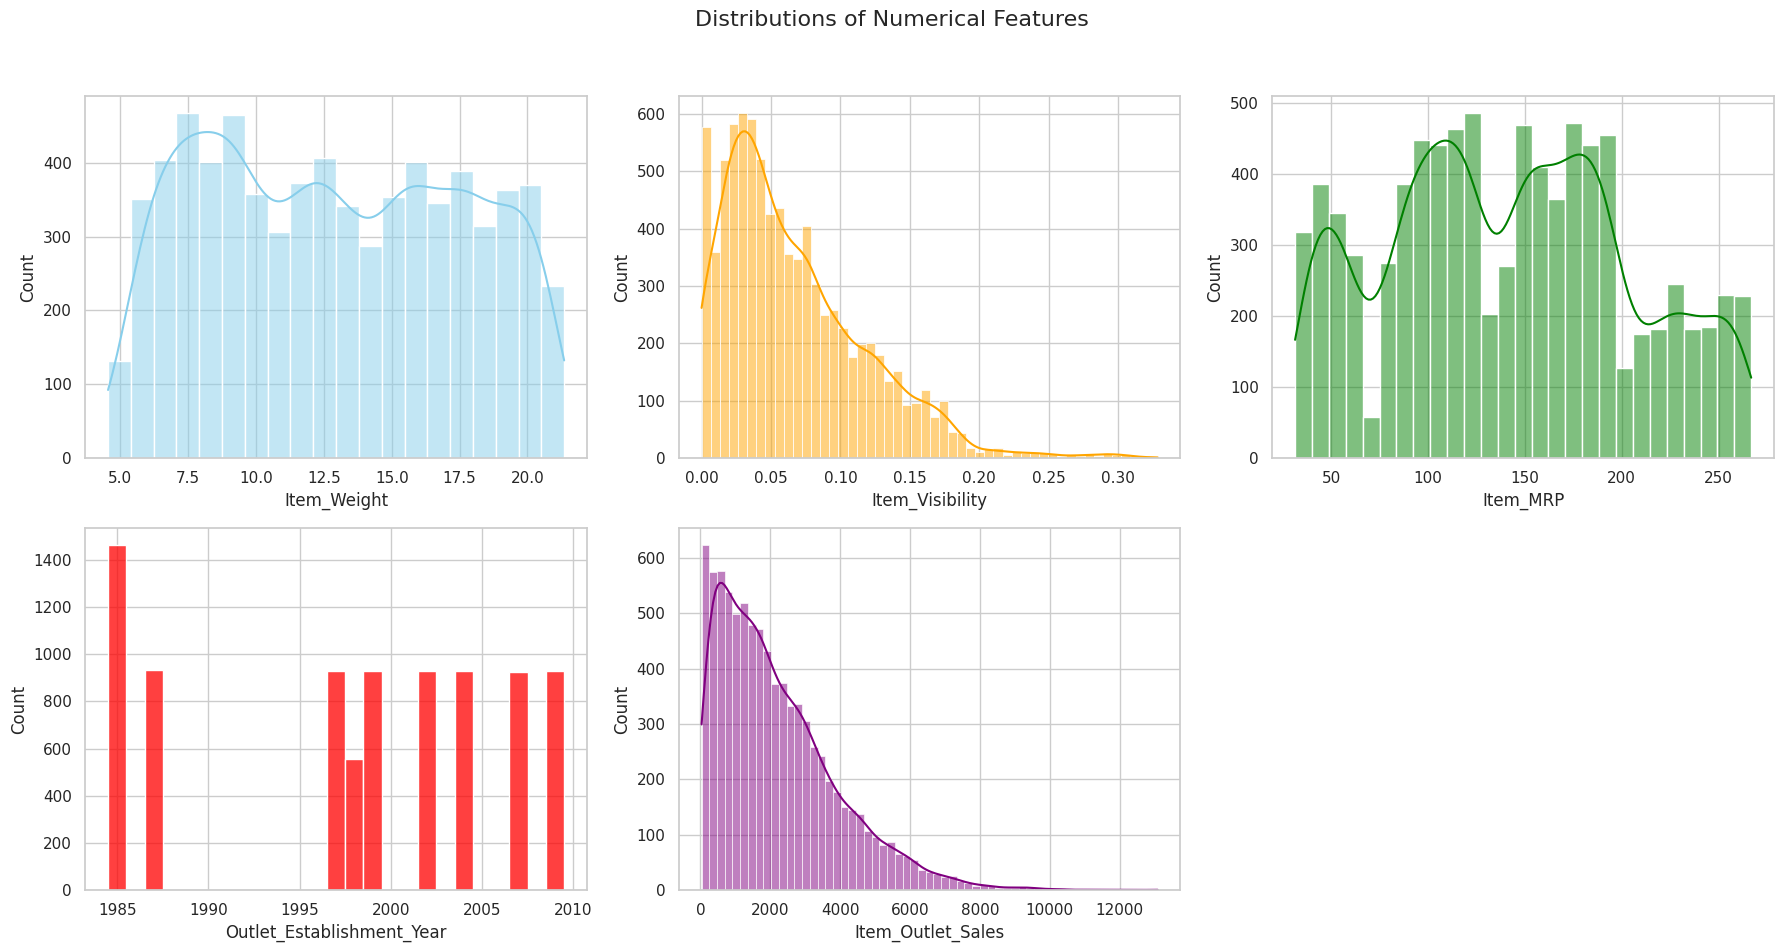

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distributions of Numerical Features', fontsize=16)
sns.histplot(df['Item_Weight'], kde=True, ax=ax[0, 0], color='skyblue')
sns.histplot(df['Item_Visibility'], kde=True, ax=ax[0, 1], color='orange')
sns.histplot(df['Item_MRP'], kde=True, ax=ax[0, 2], color='green')
sns.histplot(df['Outlet_Establishment_Year'], kde=False, ax=ax[1, 0], color='red', discrete=True)
sns.histplot(df['Item_Outlet_Sales'], kde=True, ax=ax[1, 1], color='purple')
fig.delaxes(ax[1][2])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


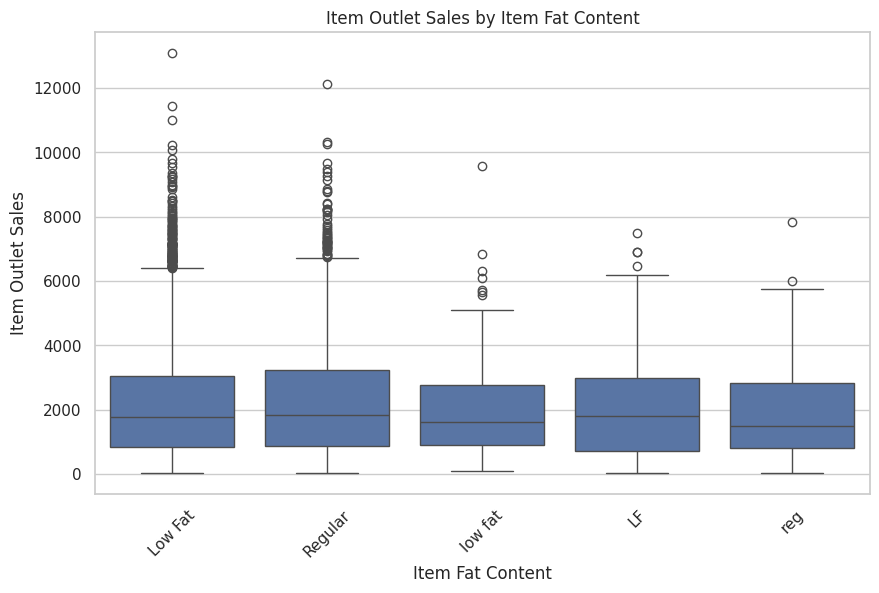

In [9]:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
    plt.title('Item Outlet Sales by Item Fat Content')
    plt.xticks(rotation=45)
    plt.xlabel('Item Fat Content')
    plt.ylabel('Item Outlet Sales')
    plt.show()




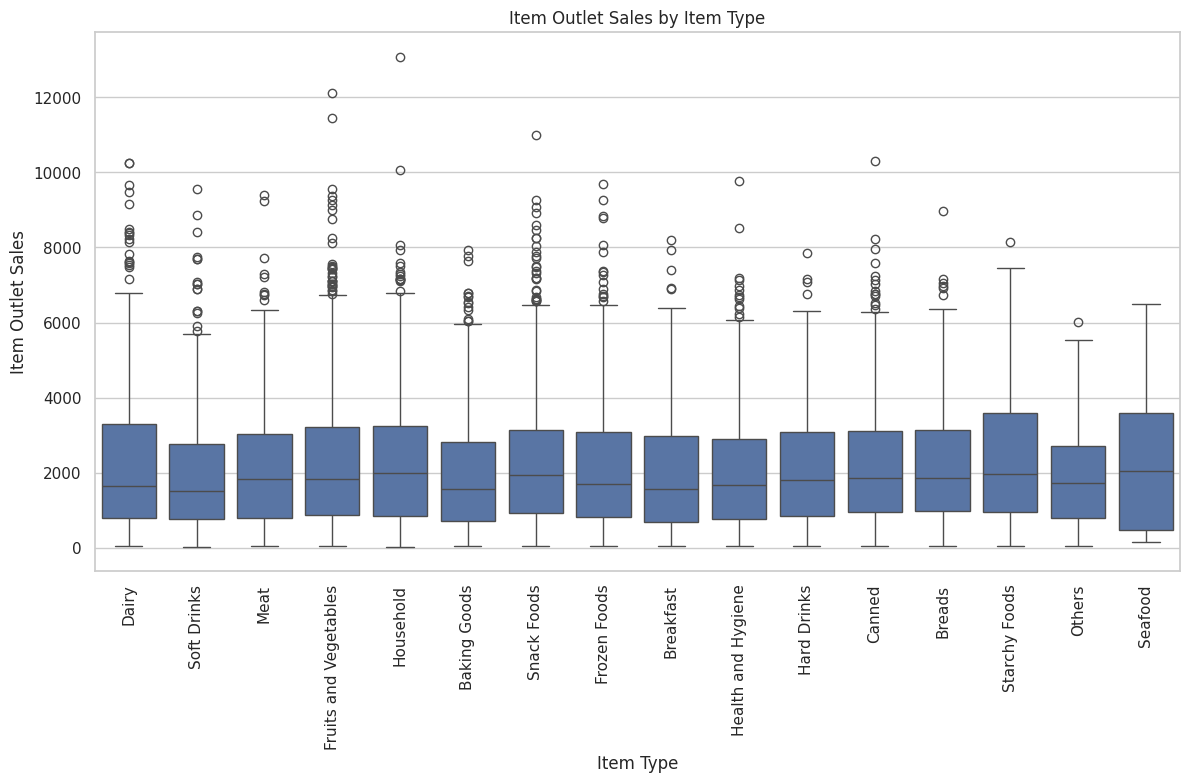

In [14]:

    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
    plt.title('Item Outlet Sales by Item Type')
    plt.xticks(rotation=90)
    plt.xlabel('Item Type')
    plt.ylabel('Item Outlet Sales')
    plt.show()

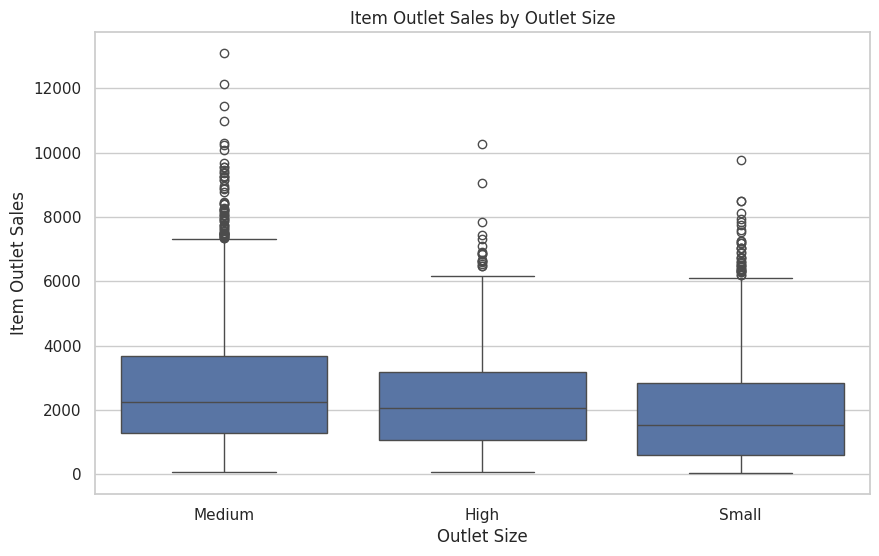

In [11]:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
    plt.title('Item Outlet Sales by Outlet Size')
    plt.xlabel('Outlet Size')
    plt.ylabel('Item Outlet Sales')
    plt.show()

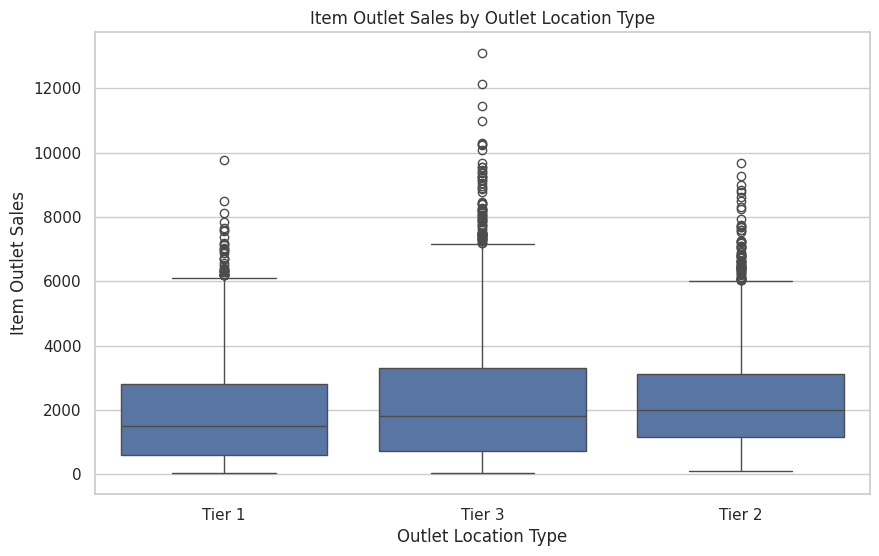

In [15]:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
    plt.title('Item Outlet Sales by Outlet Location Type')
    plt.xlabel('Outlet Location Type')
    plt.ylabel('Item Outlet Sales')
    plt.show()


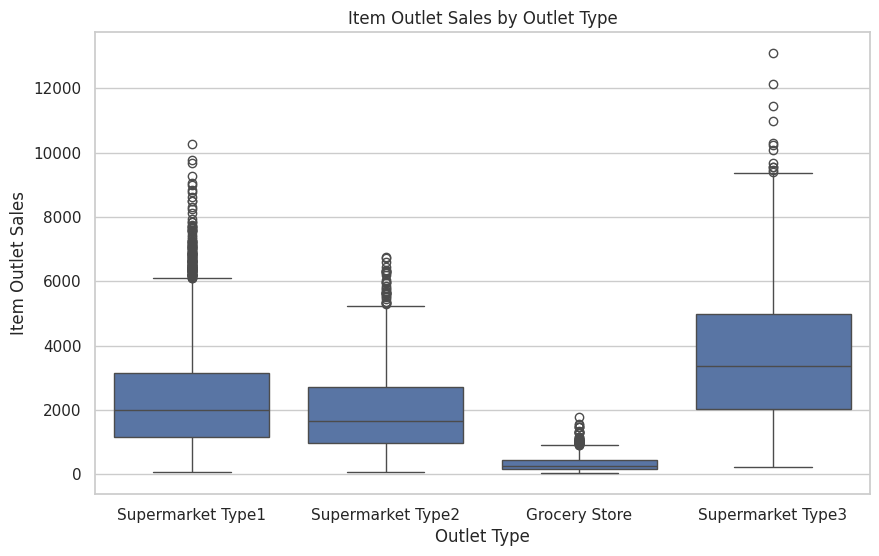

In [17]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
    plt.title('Item Outlet Sales by Outlet Type')
    plt.xlabel('Outlet Type')
    plt.ylabel('Item Outlet Sales')
    plt.show()

<ipython-input-18-36b7873400da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=df, palette='viridis')


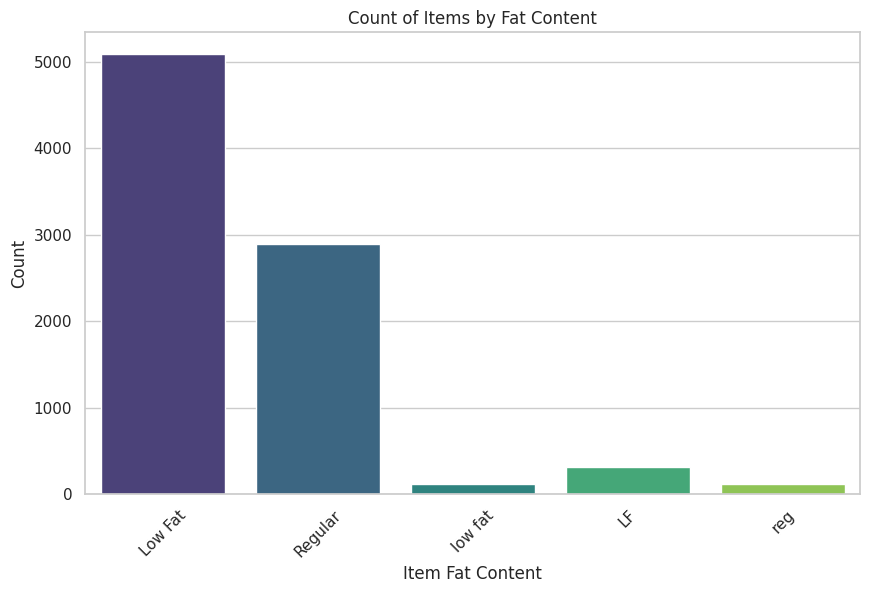

In [18]:

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Item_Fat_Content', data=df, palette='viridis')
    plt.title('Count of Items by Fat Content')
    plt.xlabel('Item Fat Content')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-19-73ffdea808bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=df, palette='viridis')


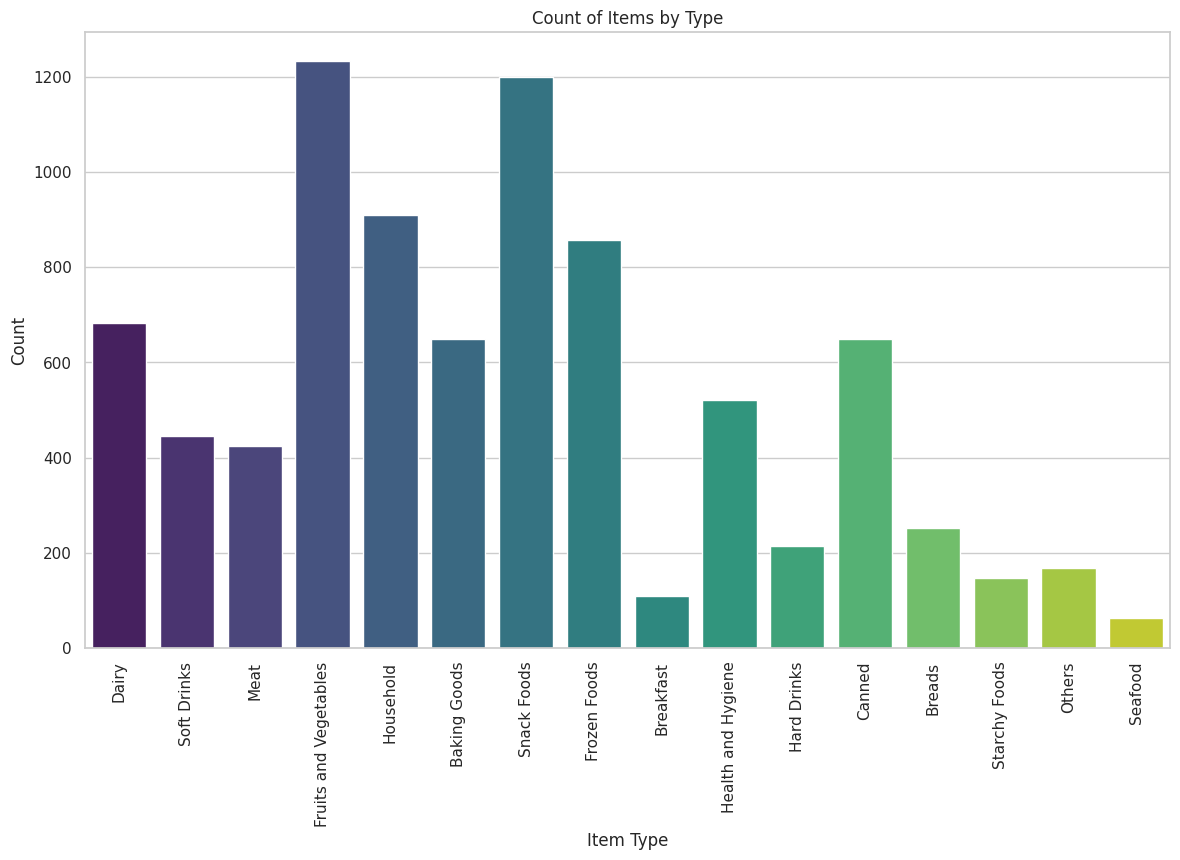

In [19]:
 plt.figure(figsize=(14, 8))
 sns.countplot(x='Item_Type', data=df, palette='viridis')
 plt.title('Count of Items by Type')
 plt.xlabel('Item Type')
 plt.ylabel('Count')
 plt.xticks(rotation=90)
 plt.show()

<ipython-input-20-45c7633b24a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size', data=df, palette='viridis')


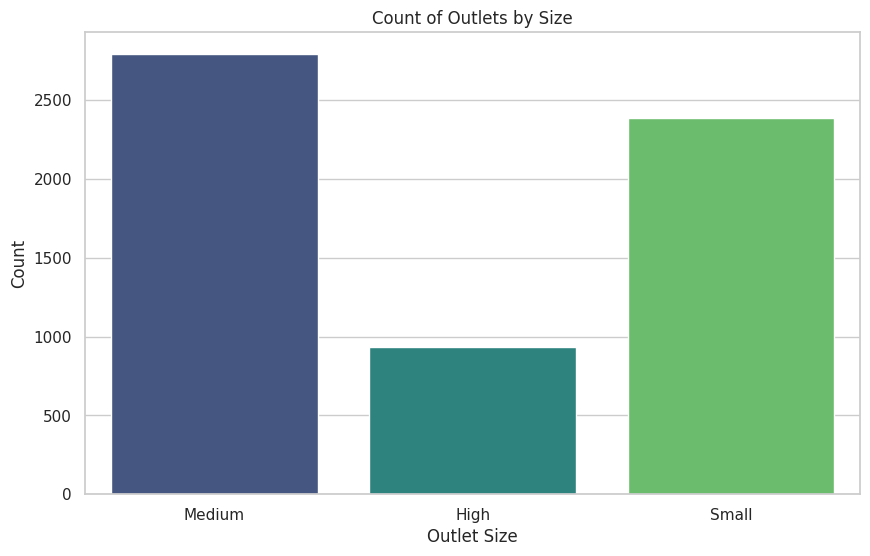

In [20]:

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Outlet_Size', data=df, palette='viridis')
    plt.title('Count of Outlets by Size')
    plt.xlabel('Outlet Size')
    plt.ylabel('Count')
    plt.show()




<ipython-input-21-116ad3e41e87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Location_Type', data=df, palette='viridis')


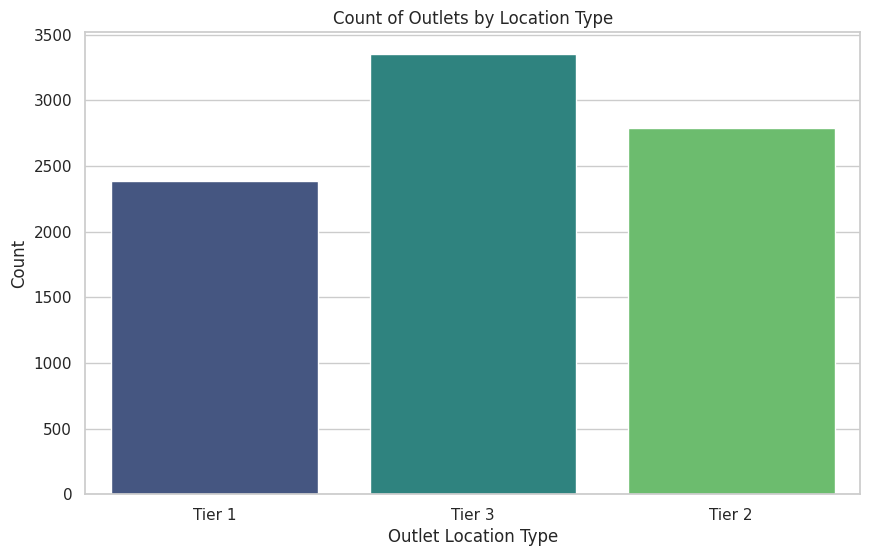

In [21]:

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Outlet_Location_Type', data=df, palette='viridis')
    plt.title('Count of Outlets by Location Type')
    plt.xlabel('Outlet Location Type')
    plt.ylabel('Count')
    plt.show()


<ipython-input-22-204e2ef14188>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Type', data=df, palette='viridis')


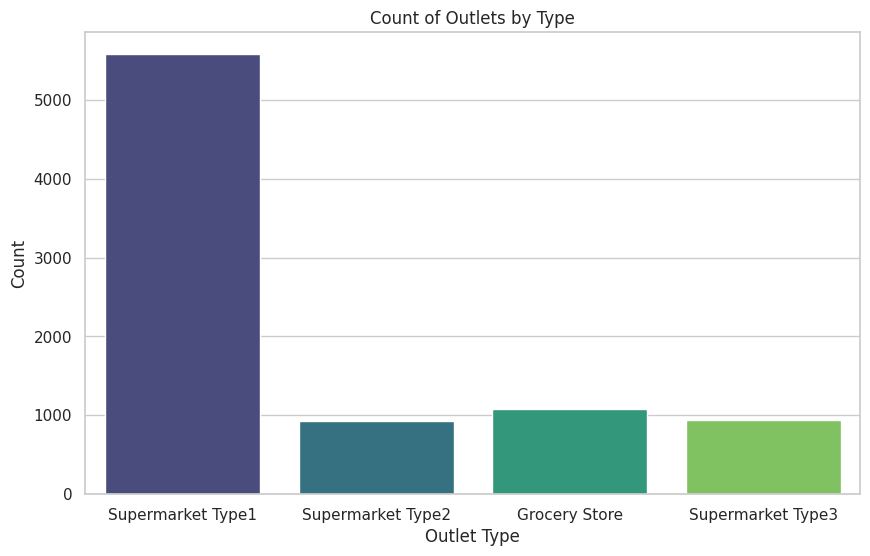

In [22]:

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Outlet_Type', data=df, palette='viridis')
    plt.title('Count of Outlets by Type')
    plt.xlabel('Outlet Type')
    plt.ylabel('Count')
    plt.show()


<ipython-input-26-da26ce11c5a4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


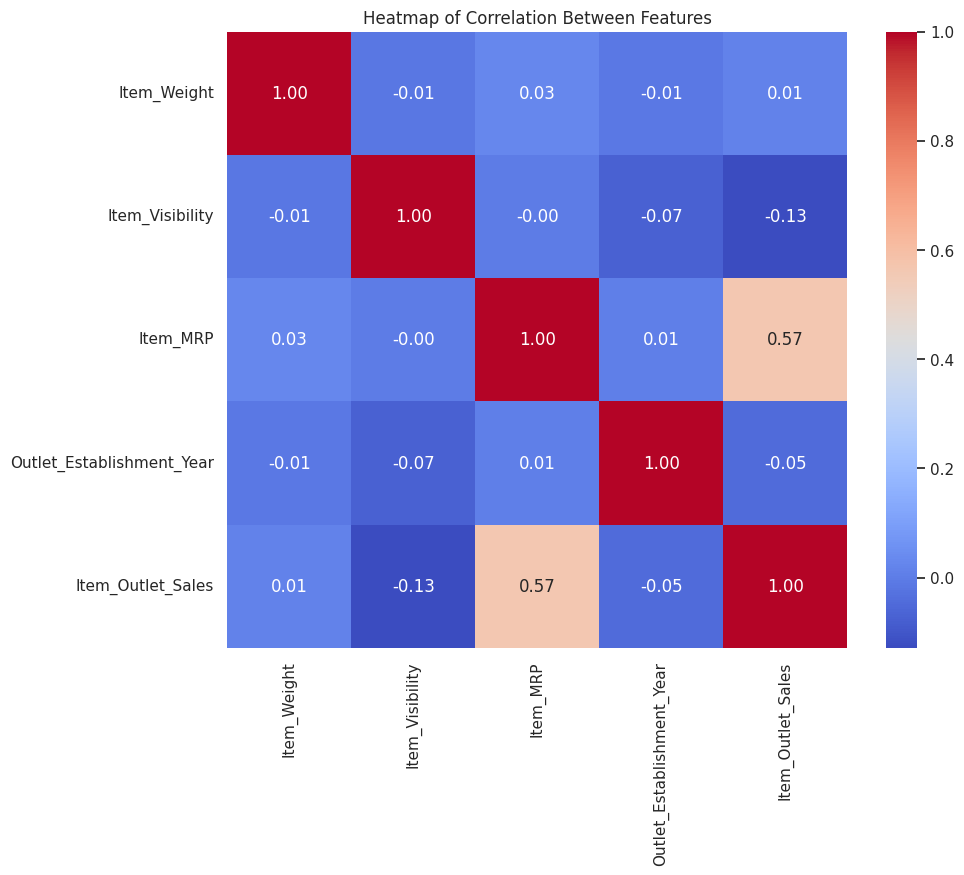

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.title('Heatmap of Correlation Between Features')
plt.show()


## **Future Inspections**